## Loading Libraries

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Libraries
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

# Lead Scoring Assignment

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. Now by this, they gets a lot of leads.But, its lead conversion rate is very poor.The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%

## 1. Reading & Understanding Data

In [3]:
# Importing the dataset
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
leads.shape

(9240, 37)

In [6]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## 2. Data Cleaning

### 2.1 Dropping unnecessay sales generated columns and columns having high percent null values

Dropping Sales Generated Columns: 'Tags','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index', 'Asymmetrique Activity Score','Asymmetrique Profile Score', 'Last Activity','Last Notable Activity','Lead Profile'

In [7]:
leads.drop(['Tags','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'Last Activity','Last Notable Activity','Lead Profile'], axis = 1, inplace= True)

In [8]:
leads.shape

(9240, 28)

In [9]:
# Check the percentage of null values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [10]:
## Replace Select
leads=leads.replace({'Select':np.NaN})

In [11]:
# Dropping variables with >35% missing values: City, How did you hear about X education, Specialization

leads.drop(['City','How did you hear about X Education','Specialization'],axis=1, inplace=True)

In [12]:
leads.shape

(9240, 25)

### 2.2 Imputing Values in columns: 'Lead Source', Total Visits','Page Views per visit', 'Country','What is your current occupation', 'What matters most in choosing a course'

In [13]:
leads['Country'].fillna(leads['Country'].mode())

0              India
1              India
2              India
3              India
4              India
            ...     
9235    Saudi Arabia
9236           India
9237           India
9238           India
9239      Bangladesh
Name: Country, Length: 9240, dtype: object

In [14]:
temp=pd.DataFrame(leads['Country'].value_counts(normalize=1))

leads.replace(to_replace = temp[temp['Country']<0.002].index, value = 'Other',inplace=True)

leads['Country'].value_counts(normalize=1)

India                   0.957663
Other                   0.015489
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Name: Country, dtype: float64

In [15]:
leads['What is your current occupation'].fillna(leads['What is your current occupation'].mode()).value_counts(normalize=1)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

### 2.3 Checking datatypes and dropping na rows

In [16]:
temp=pd.DataFrame(leads['What is your current occupation'].value_counts(normalize=1))
leads.replace(to_replace = temp[temp['What is your current occupation']<0.03].index, value = 'Other',inplace=True)
leads['What is your current occupation'].value_counts(normalize=1)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.005191
Name: What is your current occupation, dtype: float64

In [17]:
leads['What matters most to you in choosing a course'].fillna(leads['What matters most to you in choosing a course'].mode()).value_counts(normalize=1)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [18]:
ldf=leads.dropna(axis=0)

In [19]:
ldf.shape

(4925, 25)

In [20]:
## Percentage of remaining data

rem=(ldf.shape[0]*ldf.shape[1])/(leads.shape[0]*leads.shape[1])
rem

0.533008658008658

In [21]:
ldf.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Country                                           object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                                          object
Newspaper Article                                 object
X Education Forums                                object
Newspaper                      

In [22]:
ldf['TotalVisits']=ldf['TotalVisits'].astype(int)

### 2.4 Treating Outliers

In [23]:
ldf._get_numeric_data().columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

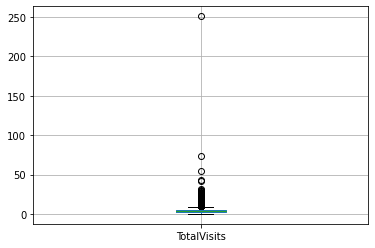

In [24]:
ldf.boxplot(['TotalVisits'])

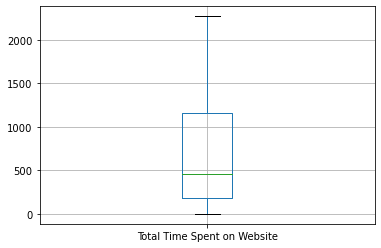

In [25]:
ldf.boxplot(['Total Time Spent on Website'])

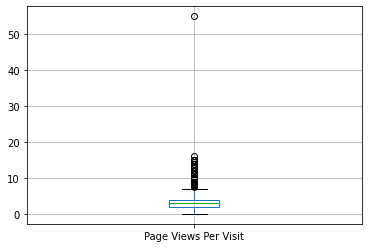

In [26]:
ldf.boxplot(['Page Views Per Visit'])
plt.show()

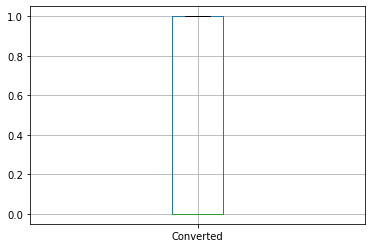

In [27]:
ldf.boxplot(['Converted'])
plt.show()

Note: The variables with large number of outliers will be treated.
Names of variables: Total Visit, Page views/visit, Total Time Spent/Website

In [28]:
## Capping the variables
q1 = ldf['TotalVisits'].quantile(0.99)
ldf['TotalVisits'][ldf['TotalVisits']>=q1]= q1
q2 = ldf['Total Time Spent on Website'].quantile(0.99)
ldf['Total Time Spent on Website'][ldf['Total Time Spent on Website']>=q2]= q2
q3 = ldf['Page Views Per Visit'].quantile(0.99)
ldf['Page Views Per Visit'][ldf['Page Views Per Visit']>=q3]= q3

In [29]:
ldf.shape

(4925, 25)

Treating Catergorical Variables

In [30]:
ldf.nunique()

Prospect ID                                      4925
Lead Number                                      4925
Lead Origin                                         3
Lead Source                                        15
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        20
Total Time Spent on Website                      1563
Page Views Per Visit                               96
Country                                             7
What is your current occupation                     4
What matters most to you in choosing a course       2
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  1
Newspaper                                           2
Digital Advertisement       

In [31]:
ldf.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                        int32
Total Time Spent on Website                      float64
Page Views Per Visit                             float64
Country                                           object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                                          object
Newspaper Article                                 object
X Education Forums                                object
Newspaper                      

In [32]:
ldf.drop(['Do Not Email','Do Not Call','What matters most to you in choosing a course',
              'Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
              'Through Recommendations','A free copy of Mastering The Interview','Magazine','Receive More Updates About Our Courses',
          'Update me on Supply Chain Content','I agree to pay the amount through cheque'], axis =1,inplace=True)

In [33]:
ldf.shape

(4925, 11)

### 2.5 EDA

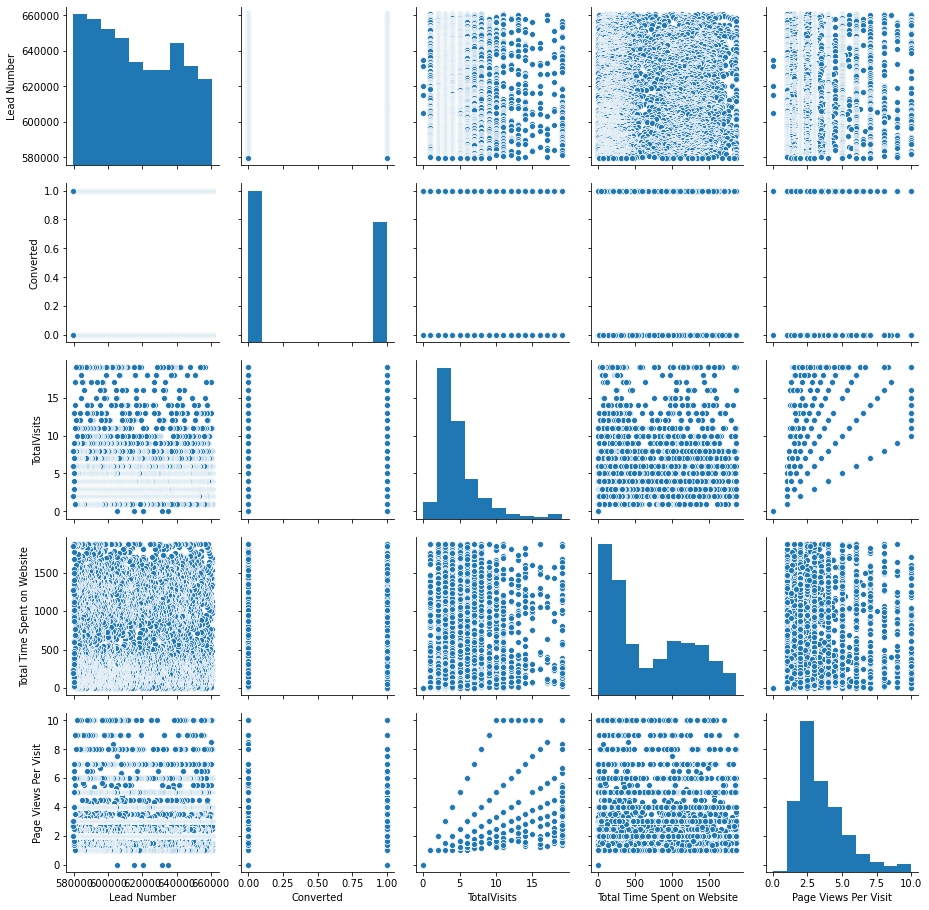

In [34]:
sns.pairplot(ldf)
plt.show()

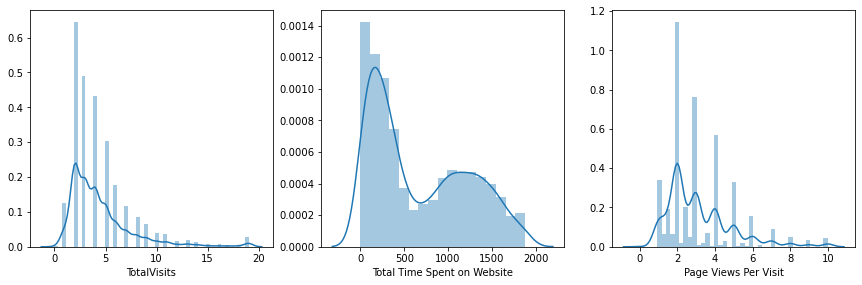

In [35]:
plt.figure(figsize=(20,20))
c = ldf[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
for i in enumerate(c):
    plt.subplot(4,4,i[0]+1)
    sns.distplot(ldf[i[1]])


## 3. Data Preparation

### 3.1 Creating Dummy Variable 

In [36]:
ldf_dummies=pd.get_dummies(data=ldf,columns=['Lead Origin','Lead Source','Country',
                                             'What is your current occupation','Get updates on DM Content'],
drop_first=True)

In [37]:
ldf_dummies.columns

Index(['Prospect ID', 'Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_testone', 'Country_Other',
       'Country_Saudi Arabia', 'Country_Singapore',
       'Country_United Arab Emirates', 'Country_United Kingdom',
       'Country_United States', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

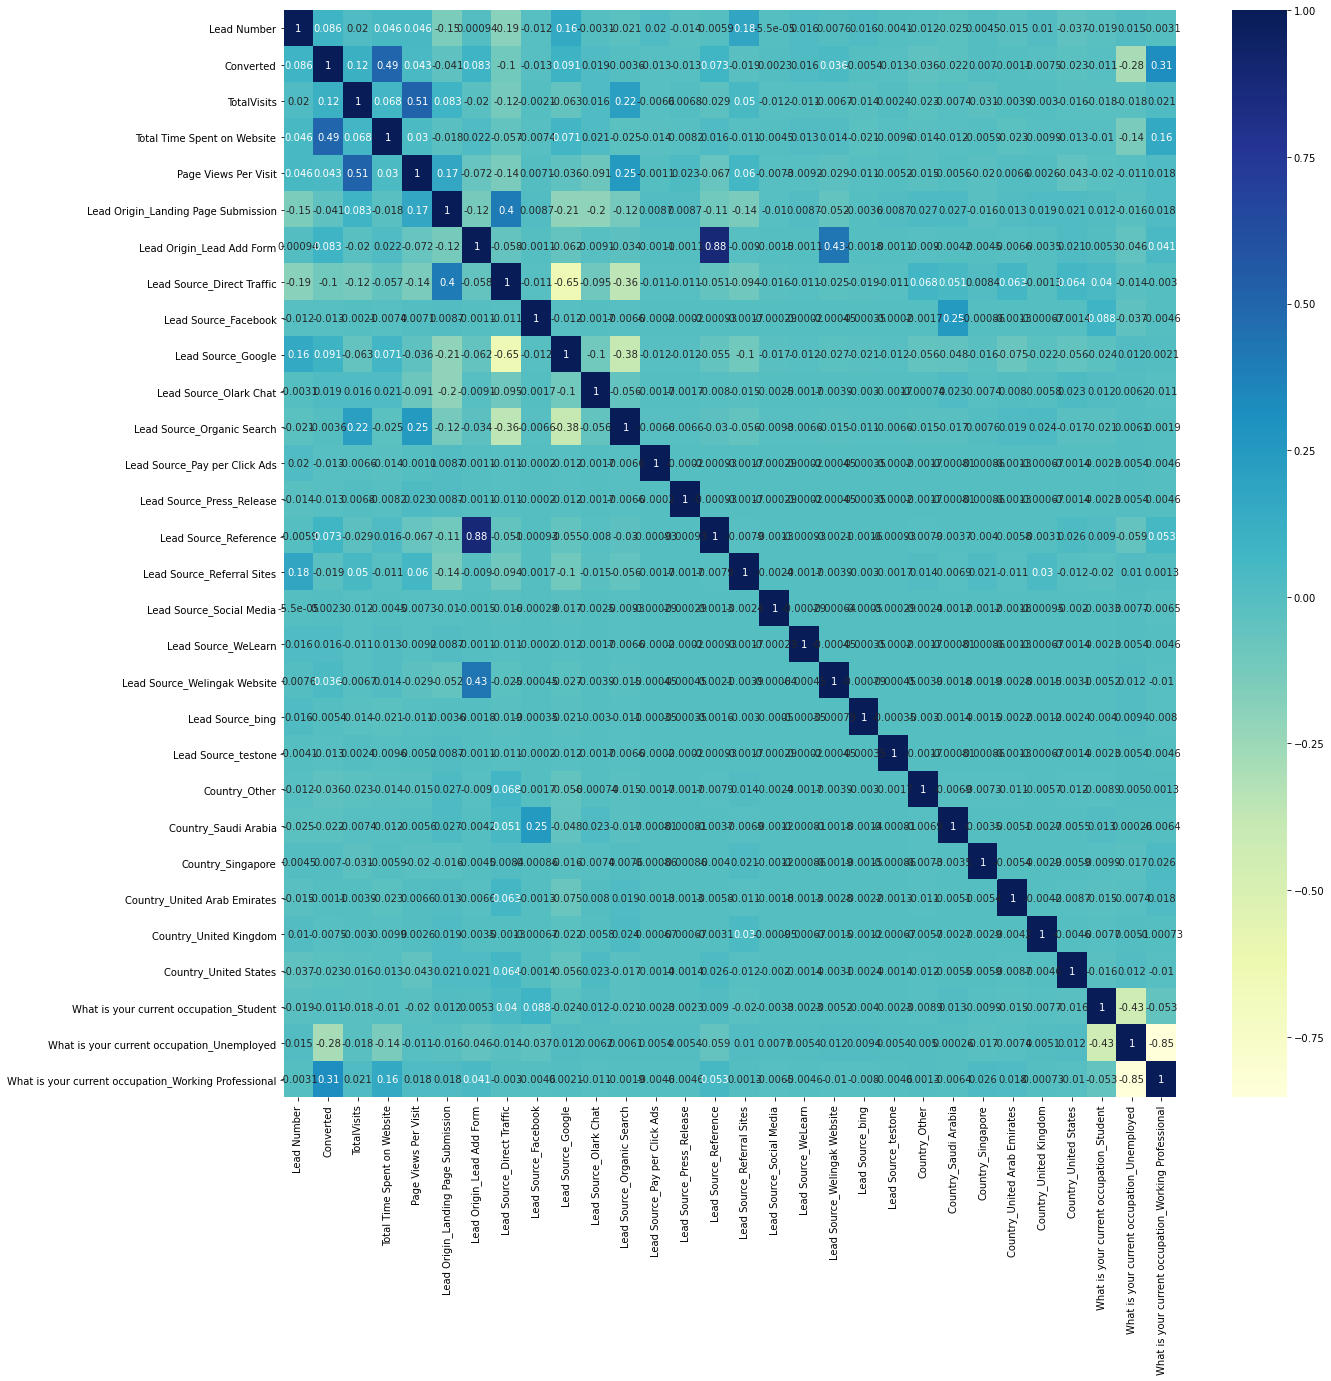

In [38]:
plt.figure(figsize = (20, 20))

sns.heatmap(ldf_dummies.corr(),annot=True, cmap = 'YlGnBu')

### 3.2 Splitting Train Test Split 

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
df=ldf_dummies

In [41]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [42]:
print(df_train.shape,df_test.shape)

(3447, 31) (1478, 31)


In [43]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_testone', 'Country_Other',
       'Country_Saudi Arabia', 'Country_Singapore',
       'Country_United Arab Emirates', 'Country_United Kingdom',
       'Country_United States', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [44]:
df.dtypes

Prospect ID                                              object
Lead Number                                               int64
Converted                                                 int64
TotalVisits                                               int32
Total Time Spent on Website                             float64
Page Views Per Visit                                    float64
Lead Origin_Landing Page Submission                       uint8
Lead Origin_Lead Add Form                                 uint8
Lead Source_Direct Traffic                                uint8
Lead Source_Facebook                                      uint8
Lead Source_Google                                        uint8
Lead Source_Olark Chat                                    uint8
Lead Source_Organic Search                                uint8
Lead Source_Pay per Click Ads                             uint8
Lead Source_Press_Release                                 uint8
Lead Source_Reference                   

In [45]:
df['Total Time Spent on Website']

1        674.0
2       1532.0
3        305.0
4       1428.0
6       1640.0
         ...  
9234     210.0
9235    1845.0
9236     238.0
9237     199.0
9239    1279.0
Name: Total Time Spent on Website, Length: 4925, dtype: float64

In [46]:
df['Page Views Per Visit']

1       2.50
2       2.00
3       1.00
4       1.00
6       2.00
        ... 
9234    2.50
9235    2.67
9236    2.00
9237    2.00
9239    3.00
Name: Page Views Per Visit, Length: 4925, dtype: float64

In [47]:
df['TotalVisits']

1       5
2       2
3       1
4       2
6       2
       ..
9234    5
9235    8
9236    2
9237    2
9239    6
Name: TotalVisits, Length: 4925, dtype: int32

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [49]:
df_train.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Source_testone,Country_Other,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
7442,87c33b0f-1d0b-4795-a4ce-b3d0495cc2ce,592449,0,0.105263,0.867493,0.200,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6273,52615093-b60f-4e53-99d5-23422d0485d3,601722,0,0.368421,0.250064,0.700,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6160,38826741-ffe2-4d37-89c4-1140c66c5560,602530,0,0.105263,0.392958,0.200,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
609,758ed6e9-5092-4638-8b73-396eca59913c,654123,0,0.263158,0.002133,0.167,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4543,2fb6e6ad-8ce7-4e79-8e75-0eb40b40f025,616102,1,0.210526,0.228737,0.400,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### 3.3 Dividing into X any Y

In [50]:
y_train = df_train.pop('Converted')
X_train = df_train

### 3.4 Dropping high correlated variable

In [51]:
X_train.drop(['Lead Source_Press_Release','Lead Source_testone'],inplace=True,axis=1)

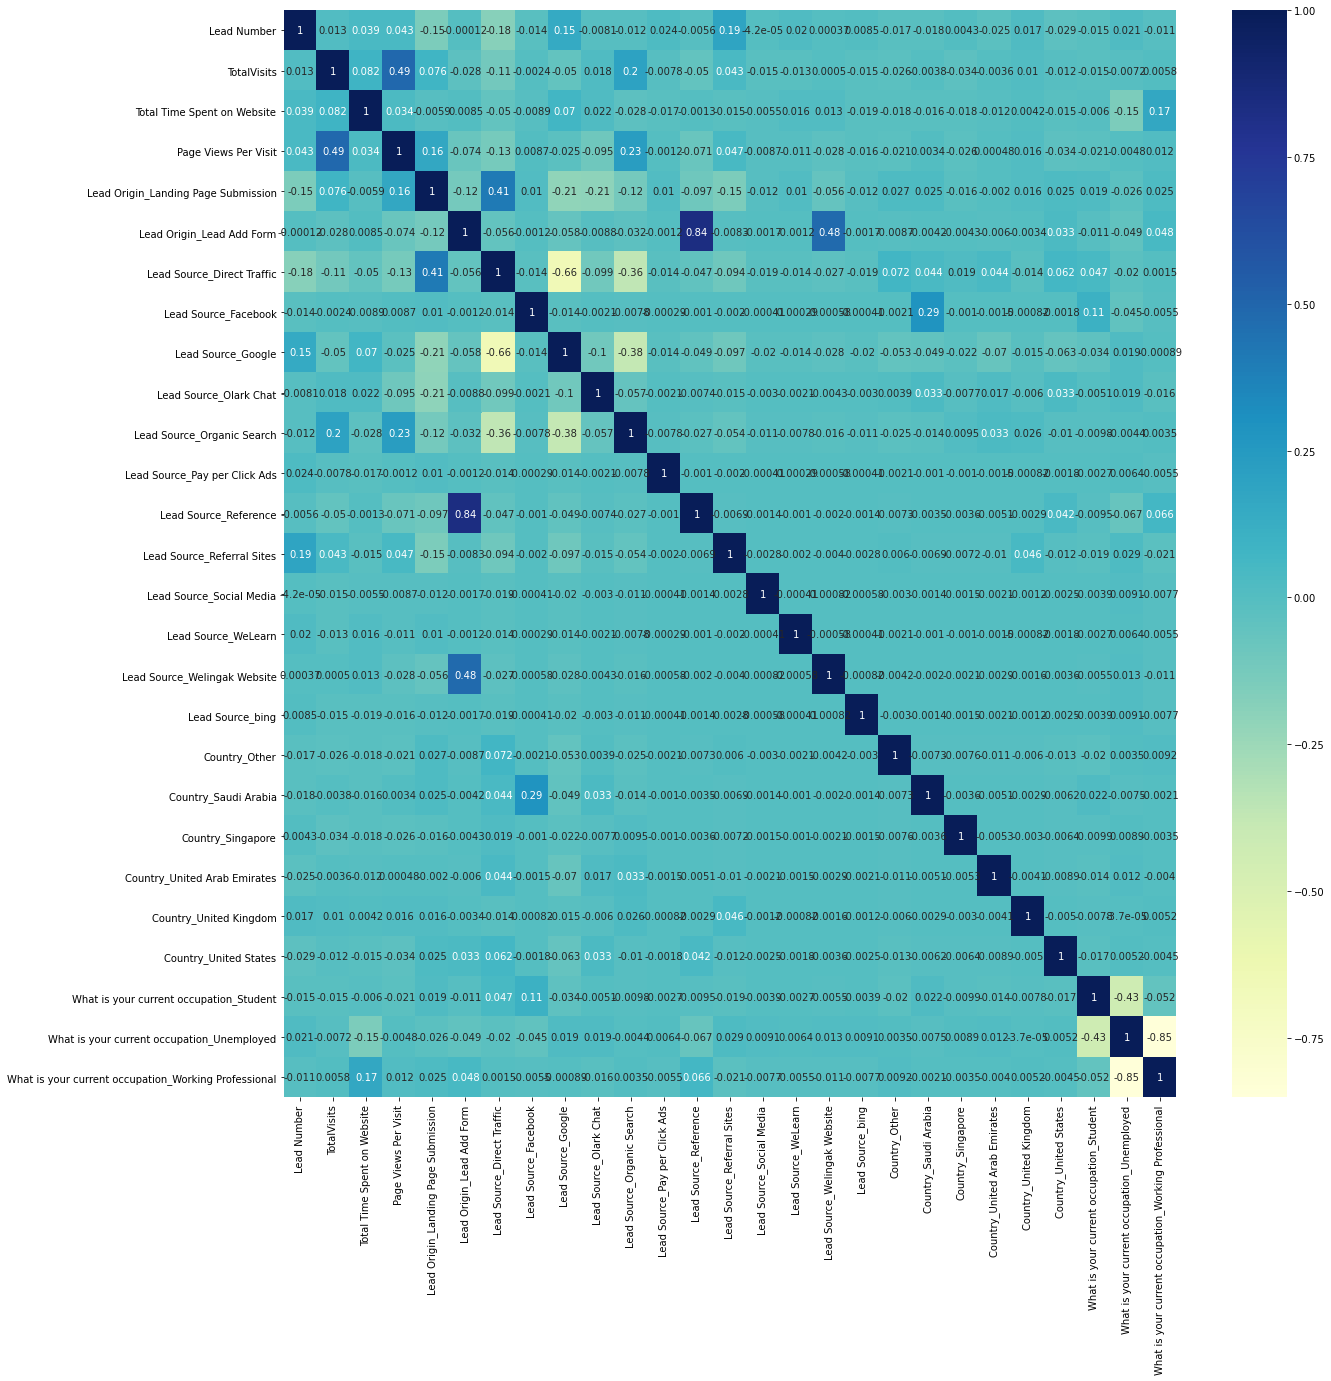

In [52]:
plt.figure(figsize = (20, 20))
sns.heatmap(X_train.corr(),annot=True,cmap = 'YlGnBu')
plt.show()

In [53]:
#Based on correlation metric: dropping Lead Origin_Lead Add Form, Lead Source_Google

X_train.drop(['Lead Origin_Lead Add Form', 'Lead Source_Google','Prospect ID'],axis=1,inplace=True)

In [54]:
X_train.shape

(3447, 25)

In [55]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             
# running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [56]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Lead Number', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 4),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 6),
 ('Lead Source_WeLearn', False, 2),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 5),
 ('Country_Other', True, 1),
 ('Country_Saudi Arabia', True, 1),
 ('Country_Singapore', True, 1),
 ('Country_United Arab Emirates', True, 1),
 ('Country_United Kingdom', True, 1),
 ('Country_United States', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Profe

In [57]:
selected_col = X_train.columns[rfe.support_]
selected_col

Index(['Lead Number', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Country_Other', 'Country_Saudi Arabia', 'Country_Singapore',
       'Country_United Arab Emirates', 'Country_United Kingdom',
       'Country_United States', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [58]:
X_train.columns[~rfe.support_]

Index(['Lead Source_Facebook', 'Lead Source_Pay per Click Ads',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing'],
      dtype='object')

## 4. Model Building

In [59]:
import statsmodels.api as sm

In [60]:
# Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[selected_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3426
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1669.3
Date:                Mon, 07 Dec 2020   Deviance:                       3338.5
Time:                        23:11:19   Pearson chi2:                 3.50e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.5582      1.310     -4.243      0.000      -8.126      -2.991
Lead Number                                           7.282e-06    1.9e-06      3.838      0.000    3.56e-06     1.1e-05
TotalVisits                                              1.8227      0.297      6.129      0.000       1.240       2.406
Total Time Spent on Website                              4.0389      0.157     25.715      0.000       3.731       4.347
Page Views Per Visit                                    -0.2813      0.294     -0.958      0.338      -0.857       0.294
Lead Origin_Landing Page Submission                     -0.1767      0.110     -1.609      0.108      -0.392       0.038
Lead Source_Direct Traffic                              -0.3668      0.106     -3.458      0.001      -0.575      -0.159
Lead Source_Olark Chat                                  -0.1152      0.346     -0.333      0.739      -0.794       0.563
Lead Source_Organic Search                              -0.1750      0.124     -1.408      0.159      -0.419       0.069
Lead Source_Reference                                   23.8488   1.76e+04      0.001      0.999   -3.45e+04    3.45e+04
Lead Source_Referral Sites                              -0.9953      0.382     -2.605      0.009      -1.744      -0.247
Lead Source_Welingak Website                            23.3297   3.79e+04      0.001      1.000   -7.43e+04    7.43e+04
Country_Other                                           -0.8986      0.428     -2.100      0.036      -1.737      -0.060
Country_Saudi Arabia                                    -1.6066      0.924     -1.739      0.082      -3.418       0.204
Country_Singapore                                        0.1717      0.682      0.252      0.801      -1.166       1.509
Country_United Arab Emirates                             0.2747      0.514      0.534      0.593      -0.733       1.282
Country_United Kingdom                                  -0.5867      0.871     -0.674      0.500      -2.293       1.120
Country_United States                                   -0.5011      0.450     -1.114      0.265      -1.383       0.381
What is your current occupation_Student                 -1.0271      0.623     -1.648      0.099      -2.249       0.195
What is your current occupation_Unemployed              -0.9076      0.566     -1.603      0.109      -2.017       0.202
What is your current occupation_Working Professional     2.0632      0.608      3.393      0.001       0.871       3.255
========================================================================================================================
"""

In [61]:
X_train_sm=X_train_sm.drop('const',axis=1)

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor



vif = pd.DataFrame()
X = X_train_sm
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF',ascending = False)
vif

,features,VIF
0,Lead Number,148.05
18,What is your current occupation_Unemployed,126.83
19,What is your current occupation_Working Profes...,14.44
3,Page Views Per Visit,6.14
4,Lead Origin_Landing Page Submission,4.98
17,What is your current occupation_Student,4.63
1,TotalVisits,4.04
2,Total Time Spent on Website,2.61
5,Lead Source_Direct Traffic,2.33
7,Lead Source_Organic Search,1.50


In [63]:
# dropping What is your current occupation_Unemployed
selected_col=selected_col.drop('What is your current occupation_Unemployed')

In [64]:
X_train_sm = sm.add_constant(X_train[selected_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3427
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1670.6
Date:                Mon, 07 Dec 2020   Deviance:                       3341.2
Time:                        23:11:20   Pearson chi2:                 3.50e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.4372      1.190     -5.412      0.000      -8.769      -4.106
Lead Number                                           7.237e-06    1.9e-06      3.817      0.000    3.52e-06     1.1e-05
TotalVisits                                              1.8461      0.297      6.214      0.000       1.264       2.428
Total Time Spent on Website                              4.0424      0.157     25.749      0.000       3.735       4.350
Page Views Per Visit                                    -0.2815      0.294     -0.959      0.338      -0.857       0.294
Lead Origin_Landing Page Submission                     -0.1813      0.110     -1.652      0.099      -0.396       0.034
Lead Source_Direct Traffic                              -0.3635      0.106     -3.430      0.001      -0.571      -0.156
Lead Source_Olark Chat                                  -0.1232      0.346     -0.356      0.722      -0.802       0.556
Lead Source_Organic Search                              -0.1722      0.124     -1.386      0.166      -0.416       0.071
Lead Source_Reference                                   24.0577   1.74e+04      0.001      0.999    -3.4e+04    3.41e+04
Lead Source_Referral Sites                              -1.0024      0.382     -2.624      0.009      -1.751      -0.254
Lead Source_Welingak Website                            23.3225   3.79e+04      0.001      1.000   -7.43e+04    7.43e+04
Country_Other                                           -0.9045      0.428     -2.113      0.035      -1.743      -0.066
Country_Saudi Arabia                                    -1.6123      0.924     -1.745      0.081      -3.423       0.198
Country_Singapore                                        0.1666      0.682      0.244      0.807      -1.171       1.504
Country_United Arab Emirates                             0.2672      0.514      0.519      0.603      -0.741       1.275
Country_United Kingdom                                  -0.5915      0.871     -0.679      0.497      -2.299       1.116
Country_United States                                   -0.5081      0.450     -1.129      0.259      -1.390       0.374
What is your current occupation_Student                 -0.1257      0.269     -0.468      0.640      -0.652       0.401
What is your current occupation_Working Professional     2.9659      0.230     12.908      0.000       2.516       3.416
========================================================================================================================
"""

In [65]:
X_train_sm=X_train_sm.drop('const',axis=1)
vif = pd.DataFrame()
X = X_train_sm
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF',ascending = False)
vif

,features,VIF
0,Lead Number,8.81
3,Page Views Per Visit,6.14
4,Lead Origin_Landing Page Submission,4.96
1,TotalVisits,4.04
2,Total Time Spent on Website,2.61
5,Lead Source_Direct Traffic,2.32
7,Lead Source_Organic Search,1.50
18,What is your current occupation_Working Profes...,1.15
6,Lead Source_Olark Chat,1.09
9,Lead Source_Referral Sites,1.07


In [66]:
# dropping Lead Source_Reference
selected_col=selected_col.drop('Page Views Per Visit')

In [67]:
X_train_sm = sm.add_constant(X_train[selected_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3428
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1671.1
Date:                Mon, 07 Dec 2020   Deviance:                       3342.2
Time:                        23:11:20   Pearson chi2:                 3.51e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.4248      1.189     -5.403      0.000      -8.755      -4.094
Lead Number                                           7.144e-06   1.89e-06      3.774      0.000    3.43e-06    1.09e-05
TotalVisits                                              1.7180      0.265      6.490      0.000       1.199       2.237
Total Time Spent on Website                              4.0414      0.157     25.748      0.000       3.734       4.349
Lead Origin_Landing Page Submission                     -0.2008      0.108     -1.862      0.063      -0.412       0.011
Lead Source_Direct Traffic                              -0.3536      0.105     -3.353      0.001      -0.560      -0.147
Lead Source_Olark Chat                                  -0.0972      0.345     -0.281      0.778      -0.774       0.580
Lead Source_Organic Search                              -0.1886      0.123     -1.533      0.125      -0.430       0.052
Lead Source_Reference                                   24.0890   1.74e+04      0.001      0.999    -3.4e+04    3.41e+04
Lead Source_Referral Sites                              -1.0216      0.382     -2.671      0.008      -1.771      -0.272
Lead Source_Welingak Website                            23.3493   3.79e+04      0.001      1.000   -7.43e+04    7.44e+04
Country_Other                                           -0.9024      0.428     -2.108      0.035      -1.741      -0.064
Country_Saudi Arabia                                    -1.6324      0.924     -1.766      0.077      -3.444       0.179
Country_Singapore                                        0.1732      0.682      0.254      0.800      -1.164       1.511
Country_United Arab Emirates                             0.2673      0.514      0.520      0.603      -0.740       1.274
Country_United Kingdom                                  -0.5888      0.873     -0.674      0.500      -2.301       1.123
Country_United States                                   -0.4952      0.450     -1.101      0.271      -1.377       0.386
What is your current occupation_Student                 -0.1233      0.269     -0.459      0.646      -0.650       0.404
What is your current occupation_Working Professional     2.9646      0.230     12.902      0.000       2.514       3.415
========================================================================================================================
"""

In [68]:
X_train_sm=X_train_sm.drop('const',axis=1)
vif = pd.DataFrame()
X = X_train_sm
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF',ascending = False)
vif

,features,VIF
0,Lead Number,7.55
3,Lead Origin_Landing Page Submission,4.79
1,TotalVisits,3.21
2,Total Time Spent on Website,2.61
4,Lead Source_Direct Traffic,2.29
6,Lead Source_Organic Search,1.48
17,What is your current occupation_Working Profes...,1.15
5,Lead Source_Olark Chat,1.08
8,Lead Source_Referral Sites,1.07
16,What is your current occupation_Student,1.03


In [69]:
# dropping Lead Number
selected_col=selected_col.drop('Lead Number')

In [70]:
X_train_sm = sm.add_constant(X_train[selected_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3429
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1678.2
Date:                Mon, 07 Dec 2020   Deviance:                       3356.4
Time:                        23:11:21   Pearson chi2:                 3.53e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9717      0.121    -16.351      0.000      -2.208      -1.735
TotalVisits                                              1.7134      0.264      6.481      0.000       1.195       2.232
Total Time Spent on Website                              4.0393      0.157     25.795      0.000       3.732       4.346
Lead Origin_Landing Page Submission                     -0.2261      0.107     -2.106      0.035      -0.437      -0.016
Lead Source_Direct Traffic                              -0.4135      0.104     -3.972      0.000      -0.618      -0.209
Lead Source_Olark Chat                                  -0.1463      0.347     -0.422      0.673      -0.826       0.533
Lead Source_Organic Search                              -0.2192      0.123     -1.789      0.074      -0.459       0.021
Lead Source_Reference                                   23.9999   1.75e+04      0.001      0.999   -3.42e+04    3.42e+04
Lead Source_Referral Sites                              -0.8006      0.377     -2.121      0.034      -1.540      -0.061
Lead Source_Welingak Website                            23.3131   3.79e+04      0.001      1.000   -7.42e+04    7.43e+04
Country_Other                                           -0.9045      0.425     -2.126      0.034      -1.738      -0.071
Country_Saudi Arabia                                    -1.5993      0.908     -1.761      0.078      -3.379       0.180
Country_Singapore                                        0.1980      0.679      0.292      0.770      -1.132       1.528
Country_United Arab Emirates                             0.2519      0.515      0.490      0.624      -0.757       1.260
Country_United Kingdom                                  -0.5549      0.864     -0.642      0.521      -2.249       1.139
Country_United States                                   -0.4985      0.448     -1.113      0.266      -1.376       0.379
What is your current occupation_Student                 -0.1201      0.268     -0.449      0.654      -0.645       0.405
What is your current occupation_Working Professional     2.9482      0.229     12.856      0.000       2.499       3.398
========================================================================================================================
"""

In [71]:
X_train_sm=X_train_sm.drop('const',axis=1)
vif = pd.DataFrame()
X = X_train_sm
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF',ascending = False)
vif

,features,VIF
2,Lead Origin_Landing Page Submission,3.65
0,TotalVisits,2.74
3,Lead Source_Direct Traffic,2.20
1,Total Time Spent on Website,2.15
5,Lead Source_Organic Search,1.39
16,What is your current occupation_Working Profes...,1.14
4,Lead Source_Olark Chat,1.05
7,Lead Source_Referral Sites,1.03
15,What is your current occupation_Student,1.03
9,Country_Other,1.02


In [72]:
# dropping 'Lead Source_Reference'
selected_col=selected_col.drop('Lead Source_Reference')

In [73]:
X_train_sm = sm.add_constant(X_train[selected_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3430
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1687.8
Date:                Mon, 07 Dec 2020   Deviance:                       3375.6
Time:                        23:11:21   Pearson chi2:                 3.54e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9150      0.119    -16.062      0.000      -2.149      -1.681
TotalVisits                                              1.6638      0.263      6.315      0.000       1.147       2.180
Total Time Spent on Website                              4.0131      0.156     25.744      0.000       3.708       4.319
Lead Origin_Landing Page Submission                     -0.2543      0.107     -2.378      0.017      -0.464      -0.045
Lead Source_Direct Traffic                              -0.4254      0.104     -4.095      0.000      -0.629      -0.222
Lead Source_Olark Chat                                  -0.1860      0.346     -0.538      0.591      -0.864       0.492
Lead Source_Organic Search                              -0.2365      0.122     -1.935      0.053      -0.476       0.003
Lead Source_Referral Sites                              -0.8271      0.377     -2.197      0.028      -1.565      -0.089
Lead Source_Welingak Website                            21.2769   1.39e+04      0.002      0.999   -2.73e+04    2.74e+04
Country_Other                                           -0.9061      0.424     -2.136      0.033      -1.738      -0.075
Country_Saudi Arabia                                    -1.5921      0.908     -1.753      0.080      -3.372       0.188
Country_Singapore                                        0.1823      0.677      0.269      0.788      -1.144       1.509
Country_United Arab Emirates                             0.2502      0.513      0.488      0.626      -0.755       1.255
Country_United Kingdom                                  -0.5510      0.862     -0.639      0.523      -2.241       1.139
Country_United States                                   -0.3255      0.433     -0.751      0.452      -1.175       0.524
What is your current occupation_Student                 -0.1249      0.267     -0.468      0.640      -0.649       0.399
What is your current occupation_Working Professional     2.9599      0.229     12.935      0.000       2.511       3.408
========================================================================================================================
"""

In [74]:
X_train_sm=X_train_sm.drop('const',axis=1)
vif = pd.DataFrame()
X = X_train_sm
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF',ascending = False)
vif

,features,VIF
2,Lead Origin_Landing Page Submission,3.64
0,TotalVisits,2.74
3,Lead Source_Direct Traffic,2.20
1,Total Time Spent on Website,2.15
5,Lead Source_Organic Search,1.39
15,What is your current occupation_Working Profes...,1.14
4,Lead Source_Olark Chat,1.05
6,Lead Source_Referral Sites,1.03
14,What is your current occupation_Student,1.03
8,Country_Other,1.02


In [75]:
selected_col=selected_col.drop('Lead Source_Welingak Website')

In [76]:
X_train_sm = sm.add_constant(X_train[selected_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3431
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1690.1
Date:                Mon, 07 Dec 2020   Deviance:                       3380.1
Time:                        23:11:22   Pearson chi2:                 3.55e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9022      0.119    -16.005      0.000      -2.135      -1.669
TotalVisits                                              1.6621      0.263      6.318      0.000       1.146       2.178
Total Time Spent on Website                              4.0166      0.156     25.761      0.000       3.711       4.322
Lead Origin_Landing Page Submission                     -0.2654      0.107     -2.487      0.013      -0.475      -0.056
Lead Source_Direct Traffic                              -0.4284      0.104     -4.123      0.000      -0.632      -0.225
Lead Source_Olark Chat                                  -0.1997      0.346     -0.578      0.564      -0.877       0.478
Lead Source_Organic Search                              -0.2431      0.122     -1.989      0.047      -0.483      -0.004
Lead Source_Referral Sites                              -0.8387      0.376     -2.228      0.026      -1.576      -0.101
Country_Other                                           -0.9080      0.424     -2.141      0.032      -1.739      -0.077
Country_Saudi Arabia                                    -1.5918      0.908     -1.753      0.080      -3.372       0.188
Country_Singapore                                        0.1779      0.676      0.263      0.793      -1.148       1.504
Country_United Arab Emirates                             0.2493      0.513      0.486      0.627      -0.756       1.254
Country_United Kingdom                                  -0.5506      0.862     -0.639      0.523      -2.240       1.139
Country_United States                                   -0.3261      0.433     -0.752      0.452      -1.176       0.523
What is your current occupation_Student                 -0.1277      0.267     -0.478      0.633      -0.652       0.396
What is your current occupation_Working Professional     2.9583      0.229     12.926      0.000       2.510       3.407
========================================================================================================================
"""

In [77]:
X_train_sm=X_train_sm.drop('const',axis=1)
vif = pd.DataFrame()
X = X_train_sm
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF',ascending = False)
vif

,features,VIF
2,Lead Origin_Landing Page Submission,3.64
0,TotalVisits,2.74
3,Lead Source_Direct Traffic,2.20
1,Total Time Spent on Website,2.15
5,Lead Source_Organic Search,1.39
14,What is your current occupation_Working Profes...,1.14
4,Lead Source_Olark Chat,1.05
6,Lead Source_Referral Sites,1.03
13,What is your current occupation_Student,1.03
7,Country_Other,1.02


In [78]:
selected_col=selected_col.drop('Country_Singapore')

In [79]:
X_train_sm = sm.add_constant(X_train[selected_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3432
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1690.1
Date:                Mon, 07 Dec 2020   Deviance:                       3380.2
Time:                        23:11:22   Pearson chi2:                 3.55e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9007      0.119    -16.011      0.000      -2.133      -1.668
TotalVisits                                              1.6600      0.263      6.314      0.000       1.145       2.175
Total Time Spent on Website                              4.0164      0.156     25.760      0.000       3.711       4.322
Lead Origin_Landing Page Submission                     -0.2663      0.107     -2.496      0.013      -0.475      -0.057
Lead Source_Direct Traffic                              -0.4275      0.104     -4.117      0.000      -0.631      -0.224
Lead Source_Olark Chat                                  -0.2005      0.346     -0.580      0.562      -0.878       0.477
Lead Source_Organic Search                              -0.2423      0.122     -1.984      0.047      -0.482      -0.003
Lead Source_Referral Sites                              -0.8393      0.376     -2.230      0.026      -1.577      -0.102
Country_Other                                           -0.9090      0.424     -2.143      0.032      -1.740      -0.078
Country_Saudi Arabia                                    -1.5927      0.908     -1.753      0.080      -3.373       0.188
Country_United Arab Emirates                             0.2482      0.513      0.484      0.628      -0.757       1.253
Country_United Kingdom                                  -0.5513      0.862     -0.639      0.523      -2.241       1.138
Country_United States                                   -0.3270      0.433     -0.755      0.451      -1.176       0.522
What is your current occupation_Student                 -0.1285      0.267     -0.481      0.631      -0.652       0.395
What is your current occupation_Working Professional     2.9589      0.229     12.928      0.000       2.510       3.408
========================================================================================================================
"""

In [80]:
X_train_sm=X_train_sm.drop('const',axis=1)
vif = pd.DataFrame()
X = X_train_sm
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF',ascending = False)
vif

,features,VIF
2,Lead Origin_Landing Page Submission,3.64
0,TotalVisits,2.74
3,Lead Source_Direct Traffic,2.20
1,Total Time Spent on Website,2.15
5,Lead Source_Organic Search,1.39
13,What is your current occupation_Working Profes...,1.14
4,Lead Source_Olark Chat,1.05
6,Lead Source_Referral Sites,1.03
12,What is your current occupation_Student,1.03
7,Country_Other,1.02


In [81]:
selected_col=selected_col.drop('What is your current occupation_Student')

In [82]:
X_train_sm = sm.add_constant(X_train[selected_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3433
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1690.2
Date:                Mon, 07 Dec 2020   Deviance:                       3380.4
Time:                        23:11:22   Pearson chi2:                 3.55e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9038      0.119    -16.059      0.000      -2.136      -1.671
TotalVisits                                              1.6624      0.263      6.323      0.000       1.147       2.178
Total Time Spent on Website                              4.0158      0.156     25.759      0.000       3.710       4.321
Lead Origin_Landing Page Submission                     -0.2664      0.107     -2.496      0.013      -0.475      -0.057
Lead Source_Direct Traffic                              -0.4293      0.104     -4.138      0.000      -0.633      -0.226
Lead Source_Olark Chat                                  -0.2016      0.346     -0.583      0.560      -0.879       0.476
Lead Source_Organic Search                              -0.2434      0.122     -1.992      0.046      -0.483      -0.004
Lead Source_Referral Sites                              -0.8369      0.376     -2.223      0.026      -1.575      -0.099
Country_Other                                           -0.9051      0.424     -2.134      0.033      -1.736      -0.074
Country_Saudi Arabia                                    -1.5953      0.907     -1.759      0.078      -3.372       0.182
Country_United Arab Emirates                             0.2525      0.513      0.492      0.622      -0.752       1.257
Country_United Kingdom                                  -0.5482      0.862     -0.636      0.525      -2.238       1.142
Country_United States                                   -0.3228      0.433     -0.745      0.456      -1.172       0.526
What is your current occupation_Working Professional     2.9627      0.229     12.951      0.000       2.514       3.411
========================================================================================================================
"""

In [83]:
X_train_sm=X_train_sm.drop('const',axis=1)
vif = pd.DataFrame()
X = X_train_sm
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF',ascending = False)
vif

,features,VIF
2,Lead Origin_Landing Page Submission,3.64
0,TotalVisits,2.74
3,Lead Source_Direct Traffic,2.19
1,Total Time Spent on Website,2.15
5,Lead Source_Organic Search,1.39
12,What is your current occupation_Working Profes...,1.14
4,Lead Source_Olark Chat,1.05
6,Lead Source_Referral Sites,1.03
7,Country_Other,1.02
11,Country_United States,1.02


In [84]:
selected_col=selected_col.drop('Country_United Arab Emirates')

In [85]:
X_train_sm = sm.add_constant(X_train[selected_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3434
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1690.3
Date:                Mon, 07 Dec 2020   Deviance:                       3380.7
Time:                        23:11:22   Pearson chi2:                 3.53e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9028      0.119    -16.053      0.000      -2.135      -1.670
TotalVisits                                              1.6623      0.263      6.322      0.000       1.147       2.178
Total Time Spent on Website                              4.0144      0.156     25.758      0.000       3.709       4.320
Lead Origin_Landing Page Submission                     -0.2671      0.107     -2.503      0.012      -0.476      -0.058
Lead Source_Direct Traffic                              -0.4259      0.104     -4.115      0.000      -0.629      -0.223
Lead Source_Olark Chat                                  -0.1969      0.346     -0.569      0.569      -0.875       0.481
Lead Source_Organic Search                              -0.2402      0.122     -1.969      0.049      -0.479      -0.001
Lead Source_Referral Sites                              -0.8371      0.376     -2.224      0.026      -1.575      -0.099
Country_Other                                           -0.9073      0.424     -2.140      0.032      -1.738      -0.076
Country_Saudi Arabia                                    -1.5978      0.907     -1.762      0.078      -3.375       0.179
Country_United Kingdom                                  -0.5498      0.862     -0.638      0.524      -2.240       1.140
Country_United States                                   -0.3257      0.433     -0.752      0.452      -1.175       0.523
What is your current occupation_Working Professional     2.9609      0.229     12.947      0.000       2.513       3.409
========================================================================================================================
"""

In [86]:
X_train_sm=X_train_sm.drop('const',axis=1)
vif = pd.DataFrame()
X = X_train_sm
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF',ascending = False)
vif

,features,VIF
2,Lead Origin_Landing Page Submission,3.64
0,TotalVisits,2.74
3,Lead Source_Direct Traffic,2.18
1,Total Time Spent on Website,2.15
5,Lead Source_Organic Search,1.38
11,What is your current occupation_Working Profes...,1.14
4,Lead Source_Olark Chat,1.05
6,Lead Source_Referral Sites,1.03
7,Country_Other,1.02
10,Country_United States,1.02


In [87]:
selected_col=selected_col.drop('Lead Source_Olark Chat')

In [88]:
X_train_sm = sm.add_constant(X_train[selected_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3435
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1690.5
Date:                Mon, 07 Dec 2020   Deviance:                       3381.0
Time:                        23:11:23   Pearson chi2:                 3.53e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9143      0.117    -16.381      0.000      -2.143      -1.685
TotalVisits                                              1.6547      0.263      6.303      0.000       1.140       2.169
Total Time Spent on Website                              4.0126      0.156     25.758      0.000       3.707       4.318
Lead Origin_Landing Page Submission                     -0.2555      0.105     -2.439      0.015      -0.461      -0.050
Lead Source_Direct Traffic                              -0.4229      0.103     -4.091      0.000      -0.625      -0.220
Lead Source_Organic Search                              -0.2327      0.121     -1.919      0.055      -0.470       0.005
Lead Source_Referral Sites                              -0.8246      0.376     -2.195      0.028      -1.561      -0.088
Country_Other                                           -0.9077      0.424     -2.142      0.032      -1.738      -0.077
Country_Saudi Arabia                                    -1.6050      0.905     -1.774      0.076      -3.378       0.168
Country_United Kingdom                                  -0.5508      0.862     -0.639      0.523      -2.241       1.139
Country_United States                                   -0.3368      0.433     -0.778      0.437      -1.186       0.512
What is your current occupation_Working Professional     2.9612      0.229     12.948      0.000       2.513       3.409
========================================================================================================================
"""

In [89]:
X_train_sm=X_train_sm.drop('const',axis=1)
vif = pd.DataFrame()
X = X_train_sm
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF',ascending = False)
vif

,features,VIF
2,Lead Origin_Landing Page Submission,3.58
0,TotalVisits,2.69
3,Lead Source_Direct Traffic,2.18
1,Total Time Spent on Website,2.12
4,Lead Source_Organic Search,1.38
10,What is your current occupation_Working Profes...,1.14
5,Lead Source_Referral Sites,1.03
6,Country_Other,1.02
7,Country_Saudi Arabia,1.01
8,Country_United Kingdom,1.01


In [90]:
selected_col=selected_col.drop('Country_United Kingdom')

In [91]:
X_train_sm = sm.add_constant(X_train[selected_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3447
Model:                            GLM   Df Residuals:                     3436
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1690.7
Date:                Mon, 07 Dec 2020   Deviance:                       3381.4
Time:                        23:11:23   Pearson chi2:                 3.53e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9139      0.117    -16.378      0.000      -2.143      -1.685
TotalVisits                                              1.6566      0.263      6.309      0.000       1.142       2.171
Total Time Spent on Website                              4.0112      0.156     25.755      0.000       3.706       4.316
Lead Origin_Landing Page Submission                     -0.2572      0.105     -2.457      0.014      -0.462      -0.052
Lead Source_Direct Traffic                              -0.4226      0.103     -4.090      0.000      -0.625      -0.220
Lead Source_Organic Search                              -0.2346      0.121     -1.935      0.053      -0.472       0.003
Lead Source_Referral Sites                              -0.8413      0.375     -2.244      0.025      -1.576      -0.107
Country_Other                                           -0.9060      0.424     -2.138      0.032      -1.736      -0.076
Country_Saudi Arabia                                    -1.6032      0.905     -1.772      0.076      -3.376       0.170
Country_United States                                   -0.3355      0.433     -0.774      0.439      -1.184       0.514
What is your current occupation_Working Professional     2.9599      0.229     12.943      0.000       2.512       3.408
========================================================================================================================
"""

In [92]:
vif = pd.DataFrame()
X = X_train_sm
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF',ascending = False)
vif

,features,VIF
0,const,7.34
4,Lead Source_Direct Traffic,1.40
3,Lead Origin_Landing Page Submission,1.24
5,Lead Source_Organic Search,1.21
1,TotalVisits,1.08
2,Total Time Spent on Website,1.04
6,Lead Source_Referral Sites,1.04
10,What is your current occupation_Working Profes...,1.03
7,Country_Other,1.01
8,Country_Saudi Arabia,1.00


In [93]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [94]:
y_train_pred[:10]

array([0.85071431, 0.42543893, 0.30087773, 0.1310154 , 0.88646004,
       0.28576906, 0.24254723, 0.19212062, 0.16632197, 0.53916354])

In [95]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conv_Prob,Prospect ID
0,0,0.850714,7442
1,0,0.425439,6273
2,0,0.300878,6160
3,0,0.131015,609
4,1,0.886460,4543


In [136]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.850714,7442,1,1,1,1,1,1,1,1,1,1,0
1,0,0.425439,6273,1,1,1,1,1,1,0,0,0,0,0
2,0,0.300878,6160,0,1,1,1,1,0,0,0,0,0,0
3,0,0.131015,609,0,1,1,0,0,0,0,0,0,0,0
4,1,0.886460,4543,1,1,1,1,1,1,1,1,1,1,0


In [137]:
from sklearn import metrics

In [138]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1546,  388],
       [ 341, 1172]], dtype=int64)

In [139]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7885117493472585

In [140]:
precision=confusion[1,1]/(confusion[0,1]+confusion[1,1])
precision

0.7512820512820513

In [101]:
recall = confusion[1,1]/(confusion[1,0]+confusion[1,1])
recall

0.7825512227362855

In [102]:
## Plotting ROC curve

In [103]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [104]:
fpr = print(FP/ float(TN+FP))

0.21458117890382628


In [105]:
tpr =print (TP / float(TP+FP))

0.740462789243277


In [106]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [107]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conv_Prob, drop_intermediate = False )

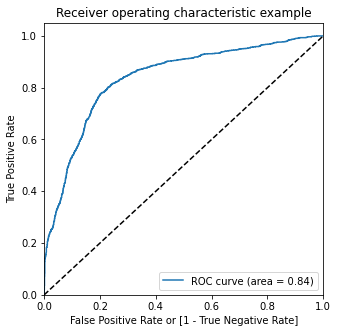

In [108]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

In [109]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
    y_train_pred_final.head()



cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.438932  1.000000  0.000000
0.1   0.1  0.482739  0.993391  0.083247
0.2   0.2  0.684073  0.909451  0.507756
0.3   0.3  0.769945  0.835426  0.718718
0.4   0.4  0.784160  0.782551  0.785419
0.5   0.5  0.779518  0.715135  0.829886
0.6   0.6  0.755149  0.617978  0.862461
0.7   0.7  0.729040  0.489755  0.916236
0.8   0.8  0.676820  0.316590  0.958635
0.9   0.9  0.635045  0.178453  0.992244


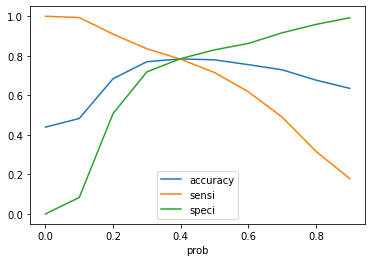

In [110]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Precision Recall Tradeoff

In [111]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

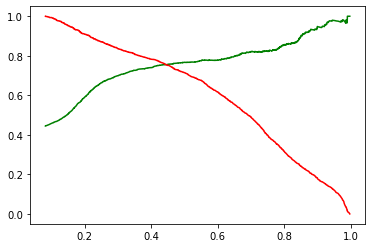

In [112]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### 5. Prediction on Test set

In [113]:
df_test.shape

(1478, 31)

In [114]:
scaler = MinMaxScaler()
num_vars = ['TotalVisits', 'Total Time Spent on Website']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [115]:
# dividing X_test and y_test
y_test = df_test.pop('Converted')
x_test = df_test

In [116]:
x_test.shape

(1478, 30)

In [117]:
y_test.shape

(1478,)

In [118]:
X_test_sm = sm.add_constant(X)

In [119]:
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Organic Search,Lead Source_Referral Sites,Country_Other,Country_Saudi Arabia,Country_United States,What is your current occupation_Working Professional
7442,1.0,0.105263,0.867493,0,0,0,0,0,0,0,0
6273,1.0,0.368421,0.250064,0,0,0,0,0,0,0,0
6160,1.0,0.105263,0.392958,1,1,0,0,0,0,0,0
609,1.0,0.263158,0.002133,0,1,0,0,0,0,0,0
4543,1.0,0.210526,0.228737,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7880,1.0,0.157895,0.107170,1,0,0,0,0,0,0,0
3721,1.0,0.157895,0.508659,0,0,1,0,0,0,0,0
719,1.0,0.105263,0.065049,1,1,0,0,0,0,0,0
114,1.0,0.263158,0.387626,0,0,0,0,0,0,0,0


In [120]:
y_test_pred = res.predict(X_test_sm)

In [121]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [122]:
# Let's see the head
y_pred_1.head()

,0
7442,0.850714
6273,0.425439
6160,0.300878
609,0.131015
4543,0.886460


In [123]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [124]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [125]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [126]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [127]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0.0,4752.0,0.850714
1,1.0,7268.0,0.425439
2,0.0,2815.0,0.300878
3,1.0,4532.0,0.131015
4,0.0,9198.0,0.886460


In [128]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conv_Prob'})

In [129]:
# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Conv','Conv_Prob'], axis=1)

In [130]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Conv_Prob
0,0.0,4752.0,0.850714
1,1.0,7268.0,0.425439
2,0.0,2815.0,0.300878
3,1.0,4532.0,0.131015
4,0.0,9198.0,0.886460


In [131]:
y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [132]:
y_pred_final.final_predicted = y_pred_final.final_predicted.astype(float)

In [143]:
y_pred_final['Lead Score'] = y_pred_final['Conv_Prob']*100

In [144]:
y_pred_final.head()

,Converted,Prospect ID,Conv_Prob,final_predicted,Lead Score
0,0.0,4752.0,0.850714,1.0,85.071431
1,1.0,7268.0,0.425439,1.0,42.543893
2,0.0,2815.0,0.300878,0.0,30.087773
3,1.0,4532.0,0.131015,0.0,13.101540
4,0.0,9198.0,0.886460,1.0,88.646004


In [145]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)